<a href="https://colab.research.google.com/github/narencastellon/Python/blob/main/Naive_Bayes_Compra_o_alquilar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cursos de  *Machine Learning*
## Modulo . Modelo de Naive bayes -Supervisado - Clasificacion
                        Elaborado por: Naren Castellon

# **1. Naive Bayes**

En este sesión, presentaremos otra familia de clasificadores denominada **Naive Bayes**. Nombrado por su uso del teorema de Bayes y por su suposición Naive de que todas las características son condicionalmente independientes entre sí dada la variable de respuesta, Naive Bayes es el primer modelo generativo que discutiremos. Primero, presentaremos el teorema de Bayes. A continuación, compararemos modelos generativos y discriminativos. Discutiremos Naive Bayes y sus supuestos y examinaremos sus variantes comunes. Finalmente, ajustaremos un modelo usando `scikit-learn`.

## **1.2 Teorema de Bayes**
El teorema de Bayes es una fórmula para calcular la probabilidad de un evento utilizando el conocimiento previo de las condiciones relacionadas. El teorema fue descubierto por un estadístico y ministro inglés llamado Thomas Bayes en el siglo XVIII. Bayes nunca publicó su trabajo; sus notas fueron editadas y publicadas póstumamente por el matemático Richard Price. El teorema de Bayes viene dado por la siguiente fórmula:

$$P(A/B)=\frac{P(B/A)P(A)}{P(B)}$$

$A$ y $B$ son eventos; $P(A)$ es la probabilidad de observar el evento $A$, y $P(B)$ es la probabilidad de observar el evento $B.P (A|B)$ es la probabilidad condicional de observar $A$ dado que $B$ fue observado. En las tareas de clasificación, nuestro objetivo es mapear características de variables explicativas a una variable de respuesta discreta; debemos encontrar la etiqueta más probable, $A$, dadas las características, $B$.

**Nota:** Un teorema es un enunciado matemático que se ha demostrado que es verdadero basándose en axiomas u otros teoremas.

In [ ]:
import pandas as pd
import numpy as np

# Visualización de los datos
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Modelación
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest

Las columnas que tenemos son:

* ingresos: los ingresos de la familia mensual
* gastos comunes: pagos de luz, agua, gas, etc mensual
* pago coche: si se está pagando cuota por uno o más coches, y los gastos en combustible, etc al mes.
* gastos_otros: compra en supermercado y lo necesario para vivir al mes
* ahorros: suma de ahorros dispuestos a usar para la compra de la casa.
* vivienda: precio de la vivienda que quiere comprar esa familia
* estado civil:

    0. soltero
    1. casados
    2. divorciados

* hijos: cantidad de hijos menores y que no trabajan.
* trabajo:
  0. sin empleo
  1. autónomo (freelance)
  2. empleado
  3. empresario
  4. pareja: autónomos
  5. pareja: empleados
  6. pareja: autónomo y asalariado
  7. pareja:empresario y autónomo
  8. pareja: empresarios los dos o empresario y empleado
* comprar:
  0. No comprar
  1. Comprar (esta será nuestra columna de salida, para aprender)

In [ ]:
df_data = pd.read_csv("/content/drive/MyDrive/_Curso de ML 3 version/Sesión N° 03/comprar_alquilar.csv")
df_data.head(10)

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
5,5692,911,11,325,50875,360863,1,4,5,1
6,6830,1298,345,309,46761,429812,1,1,5,1
7,6470,1035,39,782,57439,606291,0,0,1,0
8,6251,1250,209,571,50503,291010,0,0,3,1
9,6987,1258,252,245,40611,324098,2,1,7,1


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gastos_comunes  202 non-null    int64
 2   pago_coche      202 non-null    int64
 3   gastos_otros    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   vivienda        202 non-null    int64
 6   estado_civil    202 non-null    int64
 7   hijos           202 non-null    int64
 8   trabajo         202 non-null    int64
 9   comprar         202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB


In [ ]:
 df_data.corr()
 # ingresos', 'ahorros', 'hijos', 'trabajo', 'financiar'

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
ingresos,1.000000,0.560211,-0.109780,-0.124105,0.712889,0.614721,-0.042556,-0.024483,-0.038852,0.467123
gastos_comunes,0.560211,1.000000,-0.054400,-0.099881,0.209414,0.204781,-0.057152,-0.072321,-0.079095,0.200191
pago_coche,-0.109780,-0.054400,1.000000,0.010602,-0.193299,-0.094631,0.052239,-0.044858,0.018946,-0.196468
gastos_otros,-0.124105,-0.099881,0.010602,1.000000,-0.064384,-0.054577,-0.020226,0.124845,0.047313,-0.110330
ahorros,0.712889,0.209414,-0.193299,-0.064384,1.000000,0.605836,-0.063039,0.001445,-0.023829,0.340778
vivienda,0.614721,0.204781,-0.094631,-0.054577,0.605836,1.000000,-0.113420,-0.141924,-0.211790,-0.146092
estado_civil,-0.042556,-0.057152,0.052239,-0.020226,-0.063039,-0.113420,1.000000,0.507609,0.589512,0.142799
hijos,-0.024483,-0.072321,-0.044858,0.124845,0.001445,-0.141924,0.507609,1.000000,0.699916,0.272883
trabajo,-0.038852,-0.079095,0.018946,0.047313,-0.023829,-0.211790,0.589512,0.699916,1.000000,0.341537
comprar,0.467123,0.200191,-0.196468,-0.110330,0.340778,-0.146092,0.142799,0.272883,0.341537,1.000000


**Aplicación: Comprar o alquilar**

* El teorema de Bayes es una ecuación que describe la relación de probabilidades condicionales de cantidades estadísticas. En clasificación bayesiana estamos interesados en encontrar la probabilidad de que ocurra una “clase” dadas unas características observadas (datos). Lo podemos escribir como P( Clase | Datos). El teorema de Bayes nos dice cómo lo podemos expresar en términos de cantidades que podemos calcular directamente:

$$P(Clase|Datos)=\frac{P(Datos|clase)P(Clase)}{P(Datos)}$$

* **Clase:** es una salida en particular, por ejemplo “comprar”
* **Datos:** son nuestras características, en nuestro caso los ingresos, gastos, hijos, etc
* **P(Clase|Datos):** se llama posterior (y es el resultado que queremos hallar)
* **P(Datos|Clase):** se llama “verosimilitud” (en inglés likelihood)
* **P(Clase):** se llama anterior (pues es una probabilidad que ya tenemos)
* **P(Datos):**1 se llama probabilidad marginal

Si estamos tratando de elegir entre dos clases como en nuestro caso “comprar” ó “alquilar”, entonces una manera de tomar la decisión es calcular la tasa de probabilidades a posterior:

$$\frac{P(Comprar|Datos)}{P(Alquilar|Datos)}=\frac{P(Datos|Comprar)P(Comprar)}{P(Datos|aquilar)P(alquilar)}$$

con esta maniobra, nos deshacemos del denominador de la ecuación anterior P(Datos) el llamado “probabilidad marginal”.

**Algunos supuestos para el problema formulado:**

* Está pensado en Euros pero podría ser cualquier otra moneda
* No tiene en cuenta ubicación geográfica, cuando sabemos que dependerá mucho los precios de los inmuebles de distintas zonas
* Se supone una hipoteca fija a 30 años con interés de mercado “bajo”.

Con esta información, queremos que el algoritmo aprenda y que como resultado podamos consultar nueva información y nos dé una decisión sobre comprar (1) o alquilar (0) casa.

## **Clasificador Gaussian Naive Bayes**
Uno de los tipos de clasificadores más populares es el llamado en inglés Gaussian Naive Bayes Classifier. NOTA:Hay otros clasificadores Bayesianos que no veremos en este artículo. Veamos cómo es su fórmula para comprender este curioso nombre: aplicaremos 2 clases (comprar, alquilar) y tres características: ingresos, ahorros e hijos.

$$Posterior(comprar)=\frac{P(comprar)P(ingreso|comprar)P(ahorrar|comprar)P(hijo|comprar)}{Probabilidad \ marginal}$$
\
\
$$Posterior(alquilar)=\frac{P(alquilar)P(ingreso|alquilar)P(ahorrar|alquilar)P(hijo|alquilar)}{Probabilidad \ marginal}$$

Posterior de comprar es lo que queremos hallar: $P(comprar|datos).$

Explicaremos los demá:
* $P(comprar)$ es la probabilidad que ya tenemos. Es sencillamente el número de veces que se selecciona comprar =1 en nuestro conjunto de datos, dividido el total de observaciones. En nuestro caso (luego lo veremos en Python) son 67/202

* $p(ingresos|comprar)p(ahorros|comprar)p(hijos|comprar)$ es la verosimilitud. Los nombres Gaussian y Naive (ingenuo) del algoritmo vienen de dos suposiciones:
  1. asumimos que las características de la verosimilitud no estan correlacionada entre ellas. Esto seria que los ingresos sean independientes a la cantidad de hijos y de los ahorros. Como no es siempre cierto y es una suposición ingenua es que aparece en el nombre “naive bayes”
  2. Asumimos que el valor de las características (ingresos, hijos, etc) tendrá una distribución normal (gaussiana). Esto nos permite calcular cada parte p(ingresos|comprar) usando la función de probabilidad de densidad normal.


* probabilidad marginal muchas veces es difícil de calcular, sin embargo, por la ecuación que vimos más arriba, no la necesitaremos para obtener nuestro valor a posterior. Esto simplifica los cálculos.



## **Visualización de Datos**
Veamos qué cantidad de muestras de comprar o alquilar tenemos:

In [ ]:
print(df_data.groupby('comprar').size())# 1: compra
                                        #0: alquilar

comprar
0    135
1     67
dtype: int64


Esto son 67 que entradas en las que se recomienda comprar y 135 en las que no.

Hagamos un histograma de las características quitando la columna de resultados (comprar):

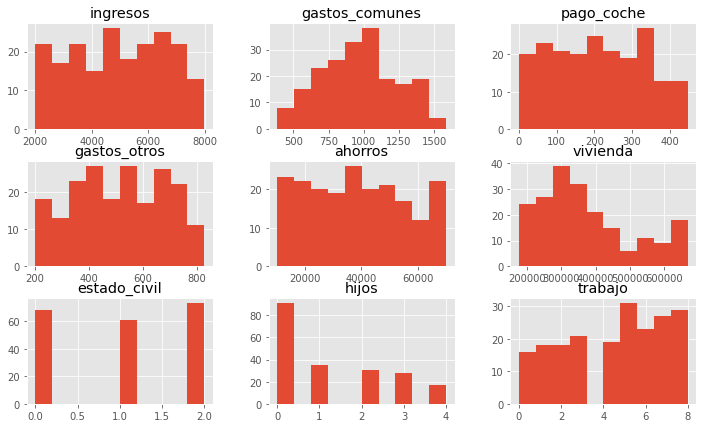

In [ ]:
#plt.figure(figsize=(12,7))
df_data.drop(['comprar'], axis=1).hist(figsize=(12,7))
plt.show()

## **Preparar los datos de entrada**
Vamos a hacer algo: procesemos algunas de estas columnas. Por ejemplo, podríamos agrupar los diversos gastos. También crearemos una columna llamada financiar que será la resta del precio de la vivienda con los ahorros de la familia.

In [ ]:
df_data['gastos']=(df_data['gastos_comunes']+df_data['gastos_otros']+df_data['pago_coche'])# Driver
df_data['financiar']=df_data['vivienda']-df_data['ahorros']
df_data.drop(['gastos_comunes','gastos_otros','pago_coche'], axis=1).head(10)

,ingresos,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,gastos,financiar
0,6000,50000,400000,0,2,2,1,1600,350000
1,6745,43240,636897,1,3,6,0,1496,593657
2,6455,57463,321779,2,1,8,1,1926,264316
3,7098,54506,660933,0,0,3,0,1547,606427
4,6167,41512,348932,0,0,3,1,1606,307420
5,5692,50875,360863,1,4,5,1,1247,309988
6,6830,46761,429812,1,1,5,1,1952,383051
7,6470,57439,606291,0,0,1,0,1856,548852
8,6251,50503,291010,0,0,3,1,2030,240507
9,6987,40611,324098,2,1,7,1,1755,283487


In [ ]:
df_data.corr()
#ingresos', 'ahorros', 'hijos', 'trabajo', 'financiar'

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,gastos,financiar
ingresos,1.000000,0.560211,-0.109780,-0.124105,0.712889,0.614721,-0.042556,-0.024483,-0.038852,0.467123,0.362823,0.564351
gastos_comunes,0.560211,1.000000,-0.054400,-0.099881,0.209414,0.204781,-0.057152,-0.072321,-0.079095,0.200191,0.765056,0.191851
pago_coche,-0.109780,-0.054400,1.000000,0.010602,-0.193299,-0.094631,0.052239,-0.044858,0.018946,-0.196468,0.344543,-0.075416
gastos_otros,-0.124105,-0.099881,0.010602,1.000000,-0.064384,-0.054577,-0.020226,0.124845,0.047313,-0.110330,0.437909,-0.049955
ahorros,0.712889,0.209414,-0.193299,-0.064384,1.000000,0.605836,-0.063039,0.001445,-0.023829,0.340778,0.067753,0.515402
vivienda,0.614721,0.204781,-0.094631,-0.054577,0.605836,1.000000,-0.113420,-0.141924,-0.211790,-0.146092,0.106897,0.994028
estado_civil,-0.042556,-0.057152,0.052239,-0.020226,-0.063039,-0.113420,1.000000,0.507609,0.589512,0.142799,-0.038249,-0.113521
hijos,-0.024483,-0.072321,-0.044858,0.124845,0.001445,-0.141924,0.507609,1.000000,0.699916,0.272883,-0.013228,-0.153068
trabajo,-0.038852,-0.079095,0.018946,0.047313,-0.023829,-0.211790,0.589512,0.699916,1.000000,0.341537,-0.034484,-0.224855
comprar,0.467123,0.200191,-0.196468,-0.110330,0.340778,-0.146092,0.142799,0.272883,0.341537,1.000000,0.035032,-0.204099


Y ahora veamos un resumen estadístico que nos brinda la librería Pandas con describe():

In [ ]:
reduced = df_data.drop(['gastos_comunes','gastos_otros','pago_coche'], axis=1)
reduced.describe()

,ingresos,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,gastos,financiar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,38749.668317,373349.638614,1.024752,1.232673,4.490099,0.331683,1698.752475,334599.970297
std,1682.862556,17365.231870,136371.525622,0.837184,1.367833,2.535794,0.471988,324.838005,126607.099497
min,2008.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000,1007.000000,154716.000000
25%,3513.750000,24964.250000,274810.000000,0.000000,0.000000,2.000000,0.000000,1430.500000,240410.250000
50%,4947.500000,38523.000000,340783.500000,1.000000,1.000000,5.000000,0.000000,1669.500000,301177.000000
75%,6374.500000,52150.750000,444482.000000,2.000000,2.000000,7.000000,1.000000,1928.000000,393413.000000
max,7984.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000,2543.000000,618621.000000


## **Selección de Características o Feature Selection**
En este ejercicio haremos Feature Selection para mejorar nuestros resultados con este algoritmo. En vez de utilizar las 11 columnas de datos de entrada que tenemos, vamos a utilizar una Clase de SkLearn llamada SelectKBest con la que seleccionaremos las 5 mejores características y usaremos sólo esas.

In [ ]:
#Divido las variables etiquetas
X=df_data.drop(['comprar'], axis=1)
y=df_data['comprar']# target o objetivo


In [ ]:
#
best=SelectKBest(k=5)# Seleccionar las mejores 5 variables
X_new = best.fit_transform(X, y) # ajusta
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['ingresos', 'ahorros', 'hijos', 'trabajo', 'financiar'], dtype='object')


Bien, entonces usaremos 5 de las 11 características que teníamos. Las que “más aportan” al momento de clasificar. Veamos qué grado de correlación tienen:

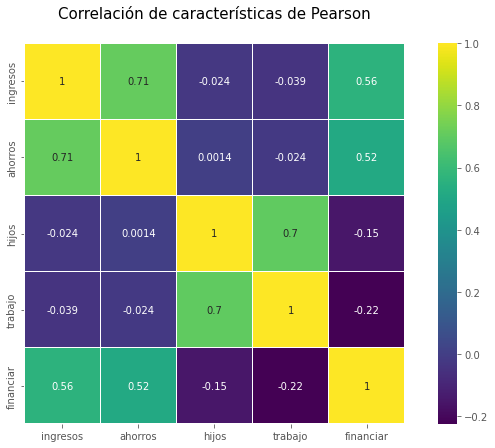

In [ ]:
used_features =X.columns[selected]

colormap = plt.cm.viridis
plt.figure(figsize=(12,7))
plt.title('Correlación de características de Pearson', y=1.05, size=15)
sb.heatmap(df_data[used_features].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

Con esto comprobamos que en general están poco correlacionadas, sin embargo también tenemos 2 valores de 0,7. Esperemos que el algoritmo sea lo suficientemente “naive” para dar buenos resultados

## **Crear el modelo Gaussian Naive Bayes con SKLearn**

Primero vamos a dividir nuestros datos de entrada en entrenamiento y test.

In [ ]:
# Split dataset in training and test datasets
X_train, X_test = train_test_split(df_data, test_size=0.2, random_state=6)
y_train =X_train["comprar"]
y_test = X_test["comprar"]

In [ ]:
X_train.head()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,gastos,financiar
2,6455,1033,98,795,57463,321779,2,1,8,1,1926,264316
81,4927,1429,141,398,33863,279323,0,0,3,0,1968,245460
52,2036,550,403,617,32738,224583,2,1,7,0,1570,191845
64,2138,449,228,617,13923,398611,0,0,1,0,1294,384688
16,5685,910,182,271,66947,365809,1,2,8,1,1363,298862


In [ ]:
X_train[used_features].head()

,ingresos,ahorros,hijos,trabajo,financiar
2,6455,57463,1,8,264316
81,4927,33863,0,3,245460
52,2036,32738,1,7,191845
64,2138,13923,0,1,384688
16,5685,66947,2,8,298862


Y creamos el modelo, lo ponemos a aprender con fit() y obtenemos predicciones sobre nuestro conjunto de test.

In [ ]:
from sklearn.naive_bayes import GaussianNB

# objeto del modelo
gnb = GaussianNB()
# entranar el modelo
gnb.fit(X_train[used_features].values,y_train)

# Hacemos las prediciones
y_pred = gnb.predict(X_test[used_features])

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(gnb.score(X_train[used_features], y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(gnb.score(X_test[used_features], y_test)))

Precisión en el set de Entrenamiento: 0.87
Precisión en el set de Test: 0.90


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Pues hemos obtenido un bonito 90% de aciertos en el conjunto de Test con nuestro querido clasificador bayesiano.

## **Probemos el modelo: ¿Comprar o Alquilar?**
Ahora, hagamos 2 predicciones para probar nuestra máquina:

* En un caso será una familia sin hijos con 2.000€ de ingresos que quiere comprar una casa de 200.000€ y tiene sólo 5.000€ ahorrados.
* El otro será una familia con 2 hijos con ingresos por 6.000€ al mes, 34.000 en ahorros y consultan si comprar una casa de 320.000€.

In [ ]:
#                 ['ingresos', 'ahorros', 'hijos', 'trabajo', 'financiar']
print(gnb.predict([[2000,        5000,     0,       5,         200000],
                   [6000,        34000,    2,       5,         320000] ]))
#Resultado esperado 0-Alquilar, 1-Comprar casa

[0 1]


Los resultados son los esperados, en el primer caso, recomienda Alquilar (0) y en el segundo comprar la casa (1).